In [9]:
# Our data management libraries
import pandas as pd
import numpy as np

# A basic visualization library
import matplotlib.pyplot as plt

# A great visualization library
import seaborn as sns

# Very important, this will make your charts appear in your notebook instead of in a new window.
%matplotlib inline

In [55]:
df = pd.read_csv('../dataset/animal-shelter-intakes-and-outcomes.csv')
df.head()

,Animal_ID,Animal_Name,Animal_Type,Primary_Color,Secondary_Color,Sex,DOB,Age,Intake_Date,Intake_Condition,...,Intake_Subtype,Reason_for_Intake,Outcome_Date,Crossing,Jurisdiction,Outcome_Type,Outcome_Subtype,intake_is_dead,outcome_is_dead,was_outcome_alive
0,A584095,NaN,CAT,BRN TABBY,NaN,Male,1/4/16,7.0,1/4/17,INJURED SEVERE,...,FIELD,NaN,1/5/17,"E BURNETT ST / CERRITOS AVE, SIGNAL HILL, CA 9...",SIGNAL HILL,EUTHANASIA,INJ SEVERE,Alive on Intake,True,0
1,A584145,PLEKLEY,CAT,BLACK,WHITE,Female,5/5/16,7.0,1/5/17,NORMAL,...,OTC,NaN,1/6/17,"3000 KALLIN AVE, LONG BEACH, CA 90808",LONG BEACH,TRANSFER,SPCALA,Alive on Intake,False,1
2,A584559,*SILK,CAT,TORTIE,NaN,Spayed,1/14/16,7.0,1/14/17,FERAL,...,OTC,NaN,1/24/17,"6800 BLK WHITE AVE, LONG BEACH, CA 90805",LONG BEACH,"SHELTER, NEUTER, RETURN",STRAYCATAL,Alive on Intake,False,1
3,A584616,NaN,CAT,GRAY,WHITE,Male,11/14/16,6.0,1/14/17,NORMAL,...,OTC,NaN,1/15/17,"1300 STANLEY AVE, LONG BEACH, CA 90804",LONG BEACH,RESCUE,CATCOVE,Alive on Intake,False,1
4,A692360,NaN,CAT,GRAY TABBY,NaN,Male,NaN,NaN,1/24/23,ILL SEVERE,...,FIELD,NaN,1/25/23,"3300 BLKATLANTIC AVE, LONGBEACH CA",LONG BEACH,EUTHANASIA,AT VET,Alive on Intake,True,0


# Minimal Data cleaning begins

## check for duplicate values

In [56]:
# 1. Print the number of duplicate rows we have in our dataframe.
print(df.duplicated().sum())

0


In [57]:
# since we are working to find days stayed by a cat in the shelter we have to create a columns for that value too
df['days_stayed'] = (pd.to_datetime(df['Outcome_Date'], format='%m/%d/%y') - pd.to_datetime(df['Intake_Date'], format='%m/%d/%y')).dt.days.fillna(-1).astype(int)
df.head()

,Animal_ID,Animal_Name,Animal_Type,Primary_Color,Secondary_Color,Sex,DOB,Age,Intake_Date,Intake_Condition,...,Reason_for_Intake,Outcome_Date,Crossing,Jurisdiction,Outcome_Type,Outcome_Subtype,intake_is_dead,outcome_is_dead,was_outcome_alive,days_stayed
0,A584095,NaN,CAT,BRN TABBY,NaN,Male,1/4/16,7.0,1/4/17,INJURED SEVERE,...,NaN,1/5/17,"E BURNETT ST / CERRITOS AVE, SIGNAL HILL, CA 9...",SIGNAL HILL,EUTHANASIA,INJ SEVERE,Alive on Intake,True,0,1
1,A584145,PLEKLEY,CAT,BLACK,WHITE,Female,5/5/16,7.0,1/5/17,NORMAL,...,NaN,1/6/17,"3000 KALLIN AVE, LONG BEACH, CA 90808",LONG BEACH,TRANSFER,SPCALA,Alive on Intake,False,1,1
2,A584559,*SILK,CAT,TORTIE,NaN,Spayed,1/14/16,7.0,1/14/17,FERAL,...,NaN,1/24/17,"6800 BLK WHITE AVE, LONG BEACH, CA 90805",LONG BEACH,"SHELTER, NEUTER, RETURN",STRAYCATAL,Alive on Intake,False,1,10
3,A584616,NaN,CAT,GRAY,WHITE,Male,11/14/16,6.0,1/14/17,NORMAL,...,NaN,1/15/17,"1300 STANLEY AVE, LONG BEACH, CA 90804",LONG BEACH,RESCUE,CATCOVE,Alive on Intake,False,1,1
4,A692360,NaN,CAT,GRAY TABBY,NaN,Male,NaN,NaN,1/24/23,ILL SEVERE,...,NaN,1/25/23,"3300 BLKATLANTIC AVE, LONGBEACH CA",LONG BEACH,EUTHANASIA,AT VET,Alive on Intake,True,0,1


In [58]:
# Print rows where 'Outcome_Date' is NaN
nan_rows = df[df['Outcome_Date'].isna()]
print(nan_rows)

      Animal_ID   Animal_Name Animal_Type Primary_Color Secondary_Color  \
1212    A701079       *LOUISA         CAT         BLACK             NaN   
1680    A705062       *SAYWUH         CAT    GRAY TABBY             NaN   
2879    A708377        *JASON         CAT     ORG TABBY             NaN   
3313    A641344          *ZEN         CAT     ORG TABBY             NaN   
4387    A663848   *ITTY BITTY         CAT        TORTIE             NaN   
...         ...           ...         ...           ...             ...   
19092   A708990          KTN3         CAT        TORTIE       ORG TABBY   
19095   A709069  *GREEN BEANS         CAT          GRAY           WHITE   
19097   A708956           NaN         CAT       UNKNOWN             NaN   
19098   A708957           NaN         CAT       UNKNOWN             NaN   
19099   A709042     *SCRATCHY         CAT        ORANGE             NaN   

            Sex       DOB   Age Intake_Date   Intake_Condition  ...  \
1212     Spayed       NaN   

## check null values

In [60]:
# 1. Print the number of null rows we have in our dataframe.
print(df.isnull().sum())

Animal_ID                0
Animal_Name           7883
Animal_Type              0
Primary_Color            0
Secondary_Color      11225
Sex                      0
DOB                    639
Age                    639
Intake_Date              0
Intake_Condition         0
Intake_Type              0
Intake_Subtype         197
Reason_for_Intake    18119
Outcome_Date           403
Crossing                55
Jurisdiction             0
Outcome_Type           404
Outcome_Subtype       2375
intake_is_dead           0
outcome_is_dead          0
was_outcome_alive        0
days_stayed              0
dtype: int64


## Observation: Animal_Name, Secondary_Color, DOB, Age, Intake_Subtype, Reason_for_Intake, Outcome_Date, Crossing, Outcome_Type and Outcome_Subtype are the columns which has null values

**Among these columns Age is the only feature or column that will be essential for our project so we will have to work around with the null values of this columns**

In [89]:
# Age is a quantitative data so we will fill out the null values of it with mean value
# df['Age']= df['Age'].fillna(df['Age'].mean()).astype(int)
df['Age']= df['Age'].fillna(-1).astype(int)
df['Age'].isna().sum()


0

In [104]:
df['Age'].min()

-7

In [90]:
# rechecking for null values
print(df.isnull().sum())

Animal_ID                0
Animal_Name           7883
Animal_Type              0
Primary_Color            0
Secondary_Color      11225
Sex                      0
DOB                    639
Age                      0
Intake_Date              0
Intake_Condition         0
Intake_Type              0
Intake_Subtype         197
Reason_for_Intake    18119
Outcome_Date           403
Crossing                55
Jurisdiction             0
Outcome_Type           404
Outcome_Subtype       2375
intake_is_dead           0
outcome_is_dead          0
was_outcome_alive        0
days_stayed              0
dtype: int64


# Data ploting and visualization begins here

### Graphing individual columns

In [141]:
# selecting rows that may matter for our prediction
new_df = df[['Primary_Color', 'Sex', 'Age','Intake_Date', 'Intake_Condition', 'Intake_Type', 'days_stayed']]
new_df

,Primary_Color,Sex,Age,Intake_Date,Intake_Condition,Intake_Type,days_stayed
0,BRN TABBY,Male,7,1/4/17,INJURED SEVERE,STRAY,1
1,BLACK,Female,7,1/5/17,NORMAL,OWNER SURRENDER,1
2,TORTIE,Spayed,7,1/14/17,FERAL,STRAY,10
3,GRAY,Male,6,1/14/17,NORMAL,STRAY,1
4,GRAY TABBY,Male,4,1/24/23,ILL SEVERE,STRAY,1
...,...,...,...,...,...,...,...
19096,BRN TABBY,Unknown,0,10/21/23,UNDER AGE/WEIGHT,STRAY,0
19097,UNKNOWN,Female,0,10/18/23,ILL MILD,STRAY,-1
19098,UNKNOWN,Male,0,10/18/23,ILL MILD,STRAY,-1
19099,ORANGE,Male,7,10/20/23,ILL MILD,STRAY,-1


In [142]:
# checking the shape of our new dataset
print(new_df.shape)

(19101, 7)


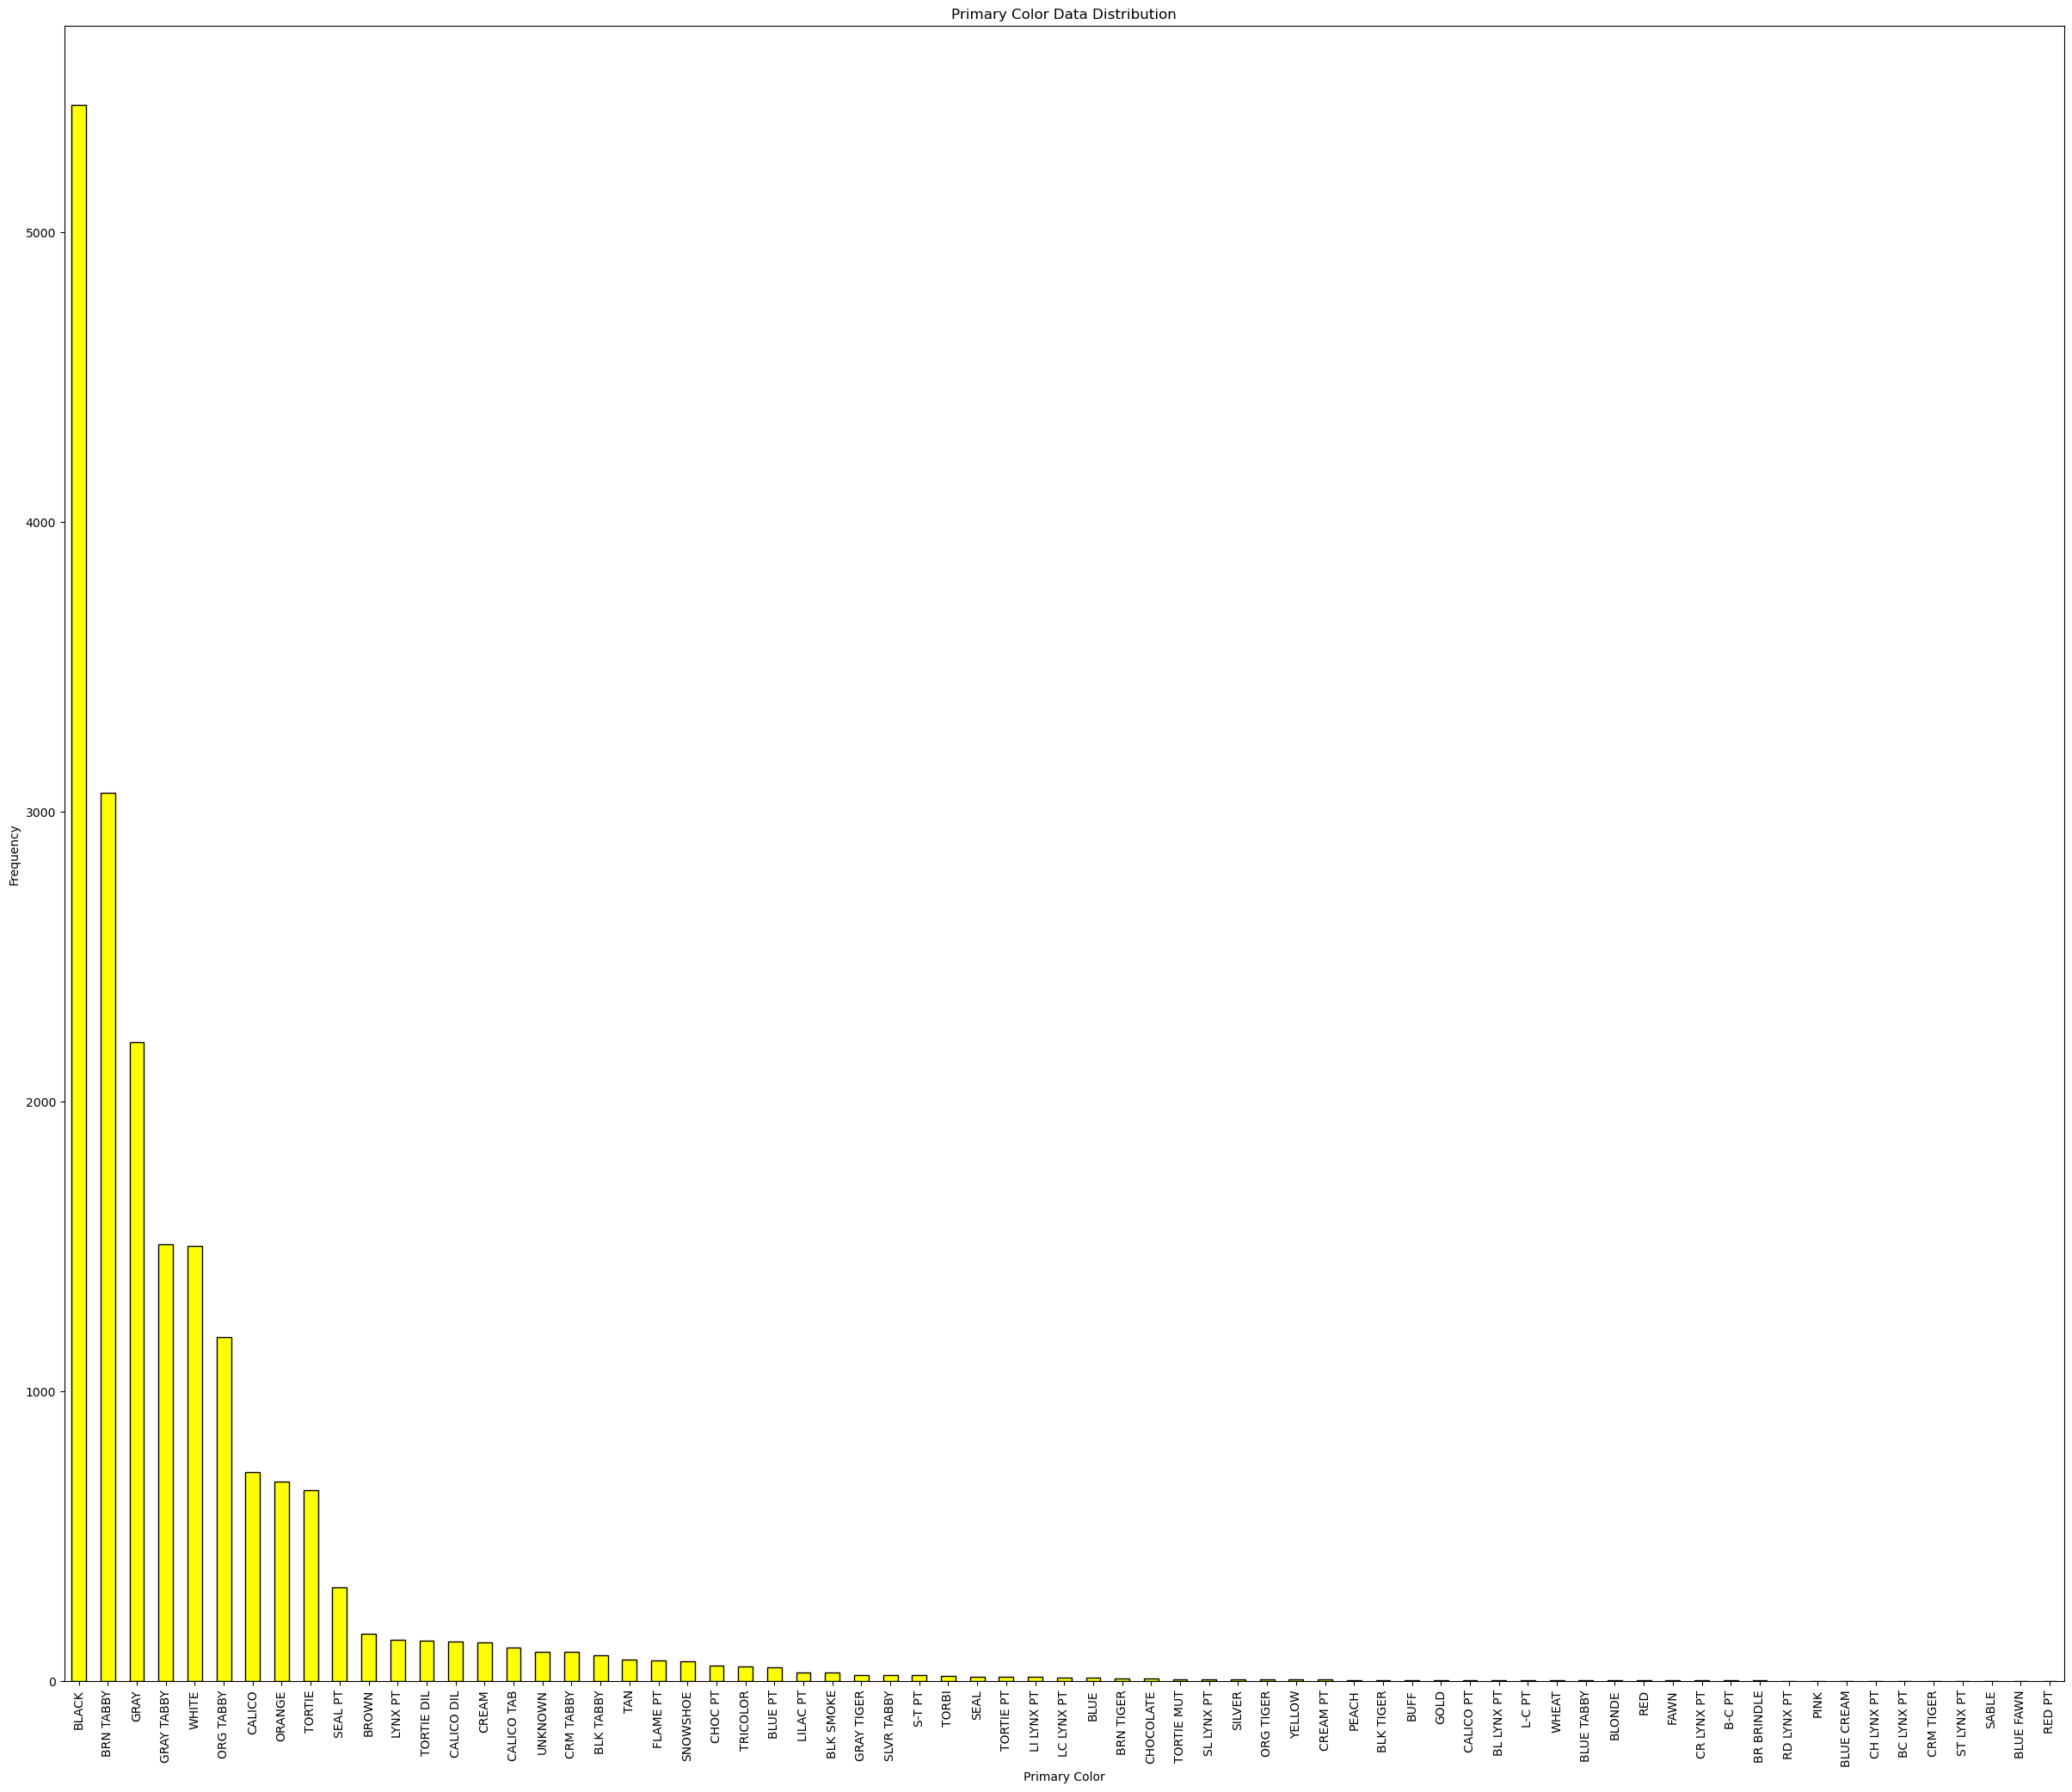

In [143]:
# ploting bar plot for Primary_Color column

category_counts = new_df['Primary_Color'].value_counts()
category_counts.plot(kind='bar', color='yellow', edgecolor='black', figsize= (30,25))

# Adding labels and title
plt.xlabel('Primary Color')
plt.ylabel('Frequency')
plt.title('Primary Color Data Distribution')

# Display the plot
plt.show()

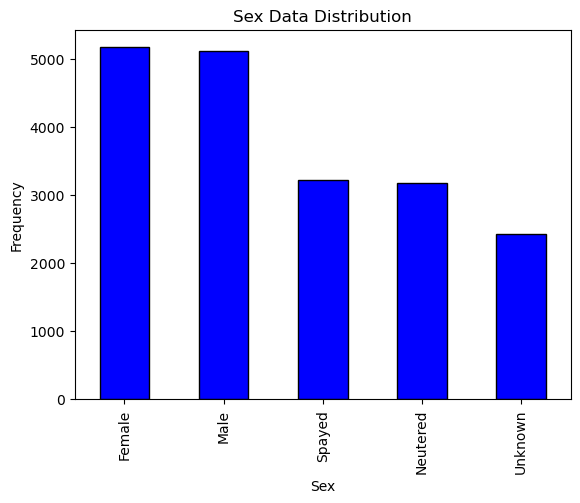

In [144]:
# ploting bar plot for sex column

category_counts = new_df['Sex'].value_counts()
category_counts.plot(kind='bar', color='blue', edgecolor='black')

# Adding labels and title
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.title('Sex Data Distribution')

# Display the plot
plt.show()

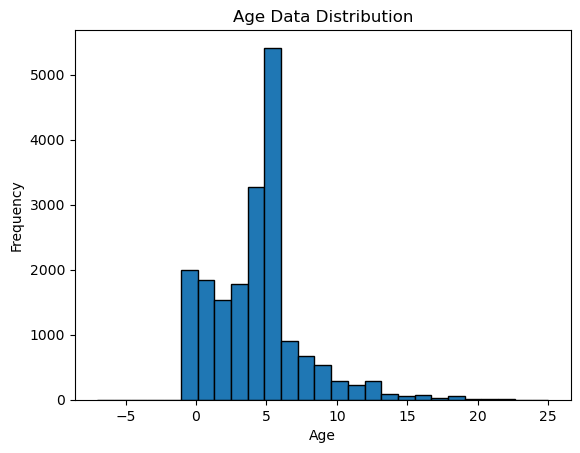

In [145]:
# ploting bar plot for age column
new_df['Age'].plot(bins=27, kind='hist', edgecolor='black')

# category_counts = new_df['Sex'].value_counts()
# category_counts.plot(kind='bar', color='blue', edgecolor='black')

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Data Distribution')

# # Display the plot
plt.show()

**Here we see histogram has outliers on both end and we need to remove these outliers for the sake of accurate prediction**

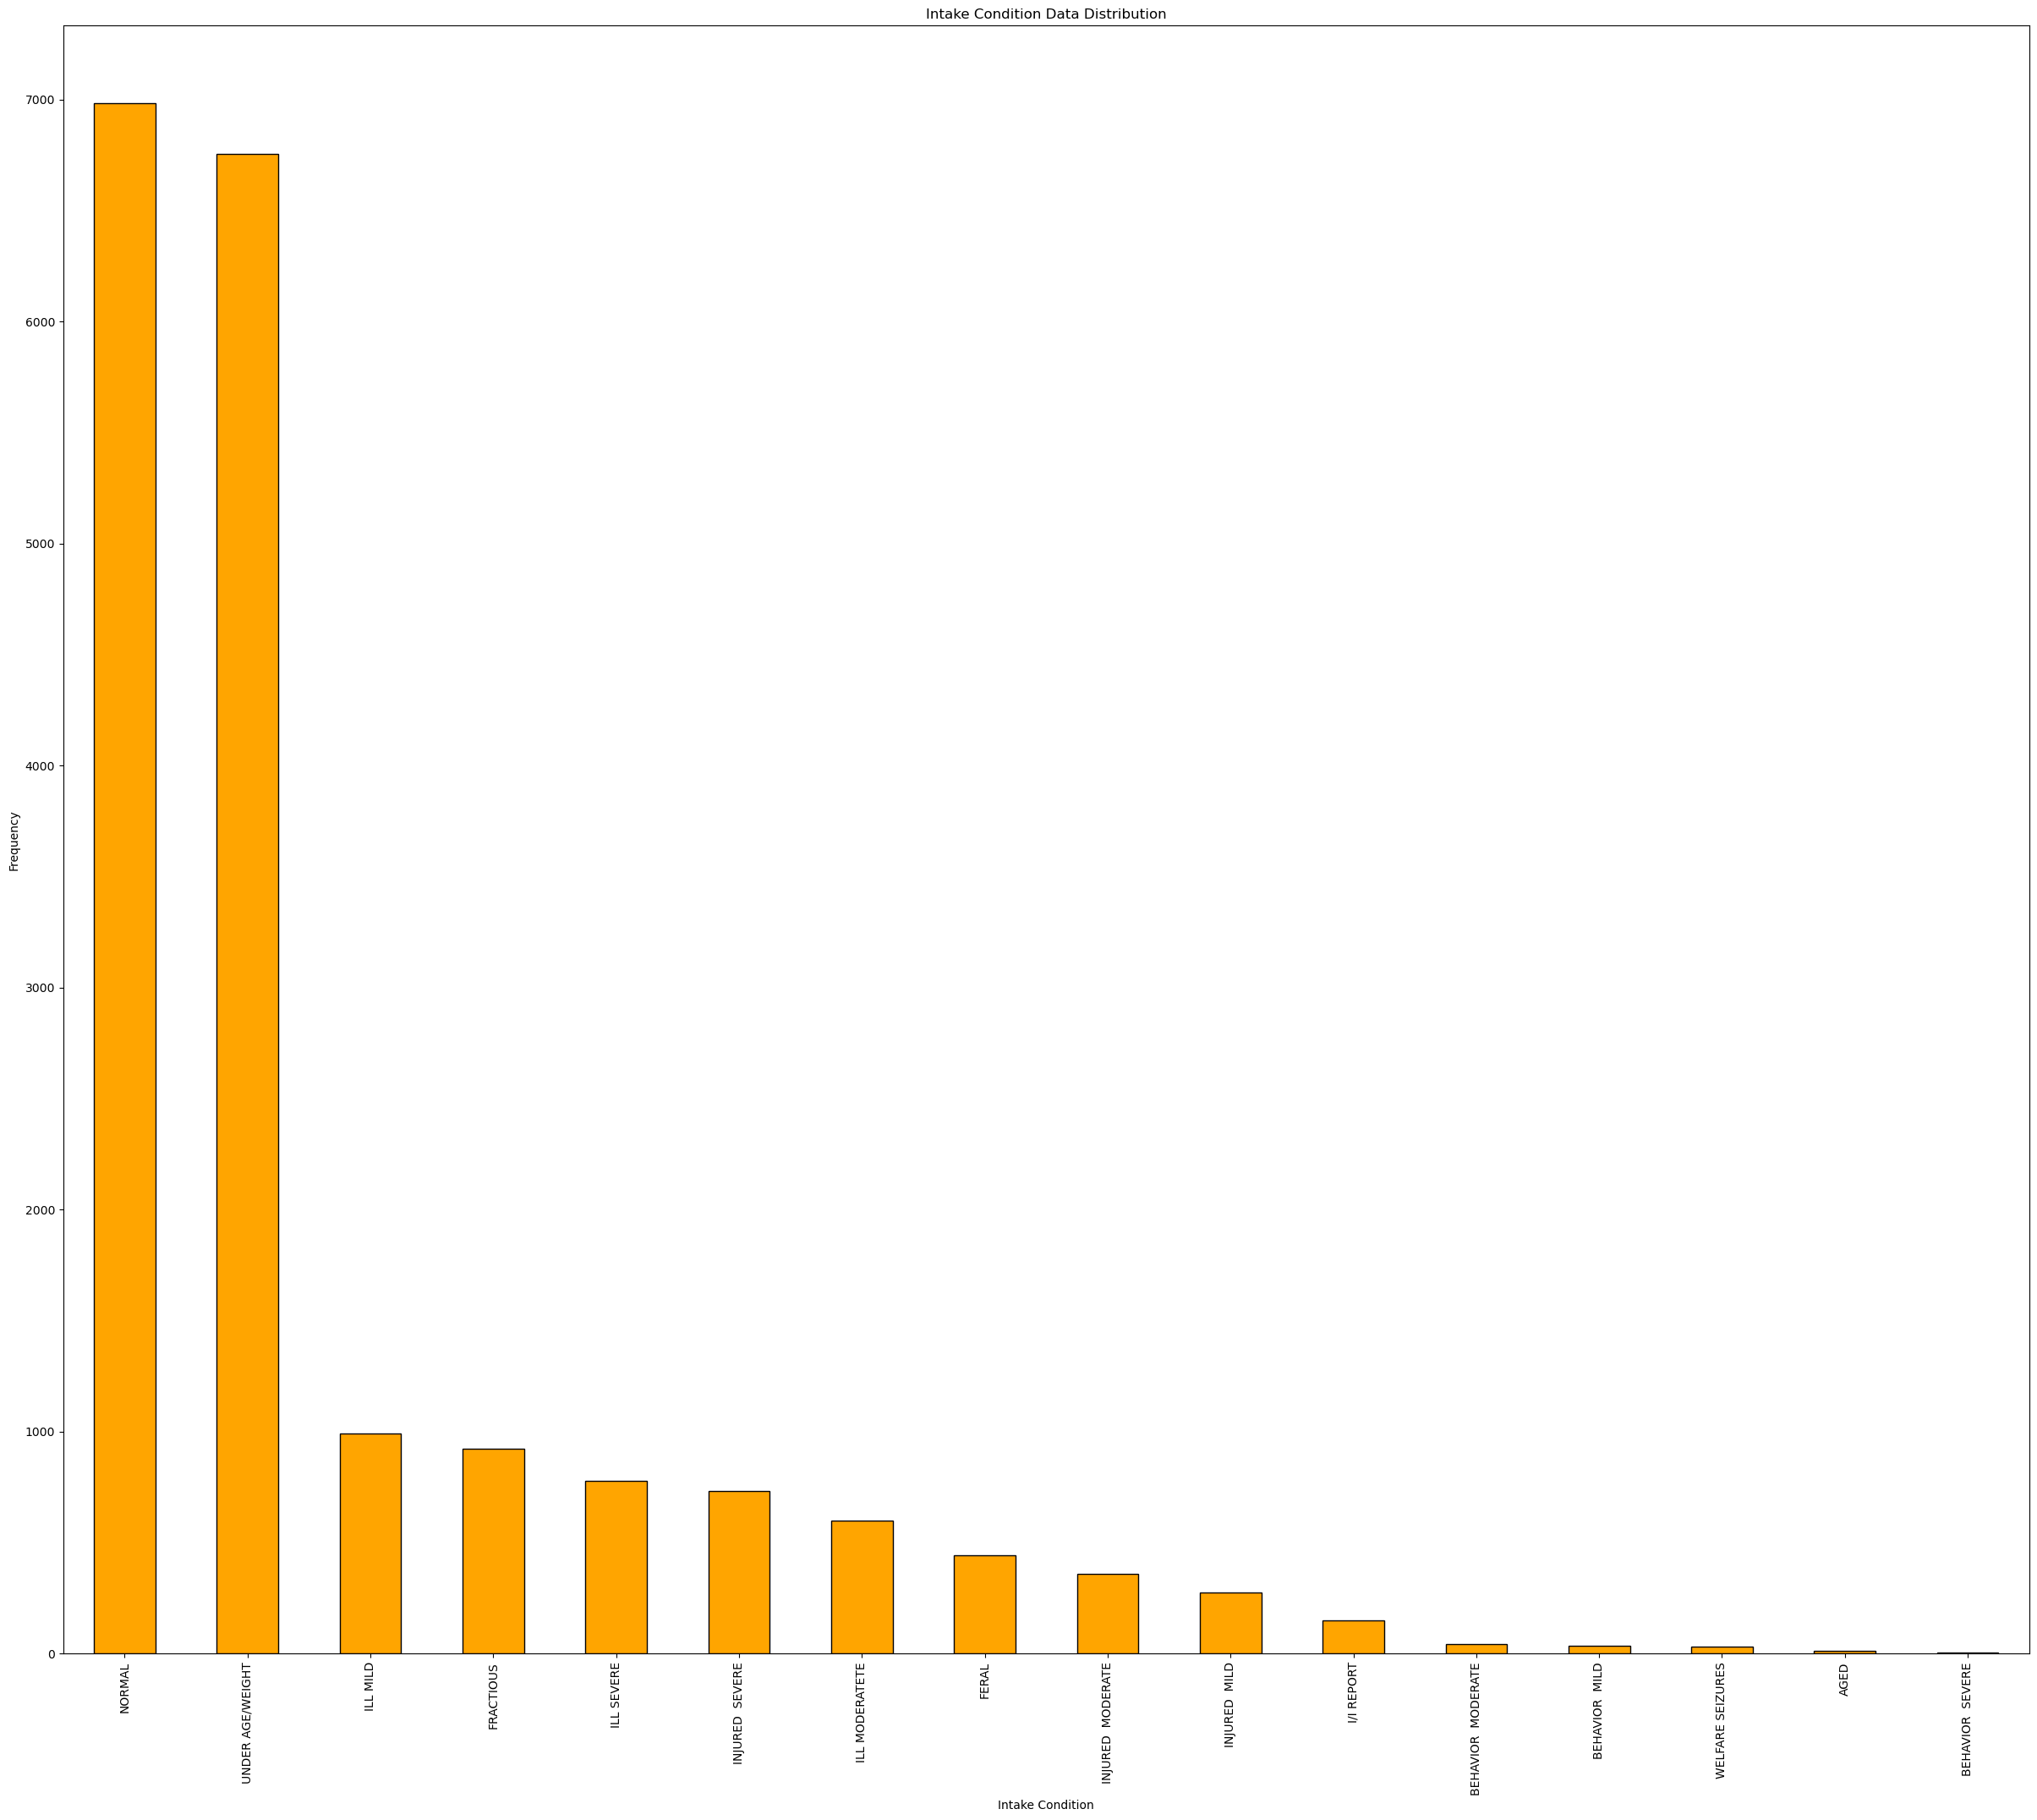

In [146]:
# ploting bar plot for Intake_Condition column
category_counts = new_df['Intake_Condition'].value_counts()
category_counts.plot(kind='bar', color='orange', edgecolor='black', figsize= (30,25))

# Adding labels and title
plt.xlabel('Intake Condition')
plt.ylabel('Frequency')
plt.title('Intake Condition Data Distribution')

# Display the plot
plt.show()

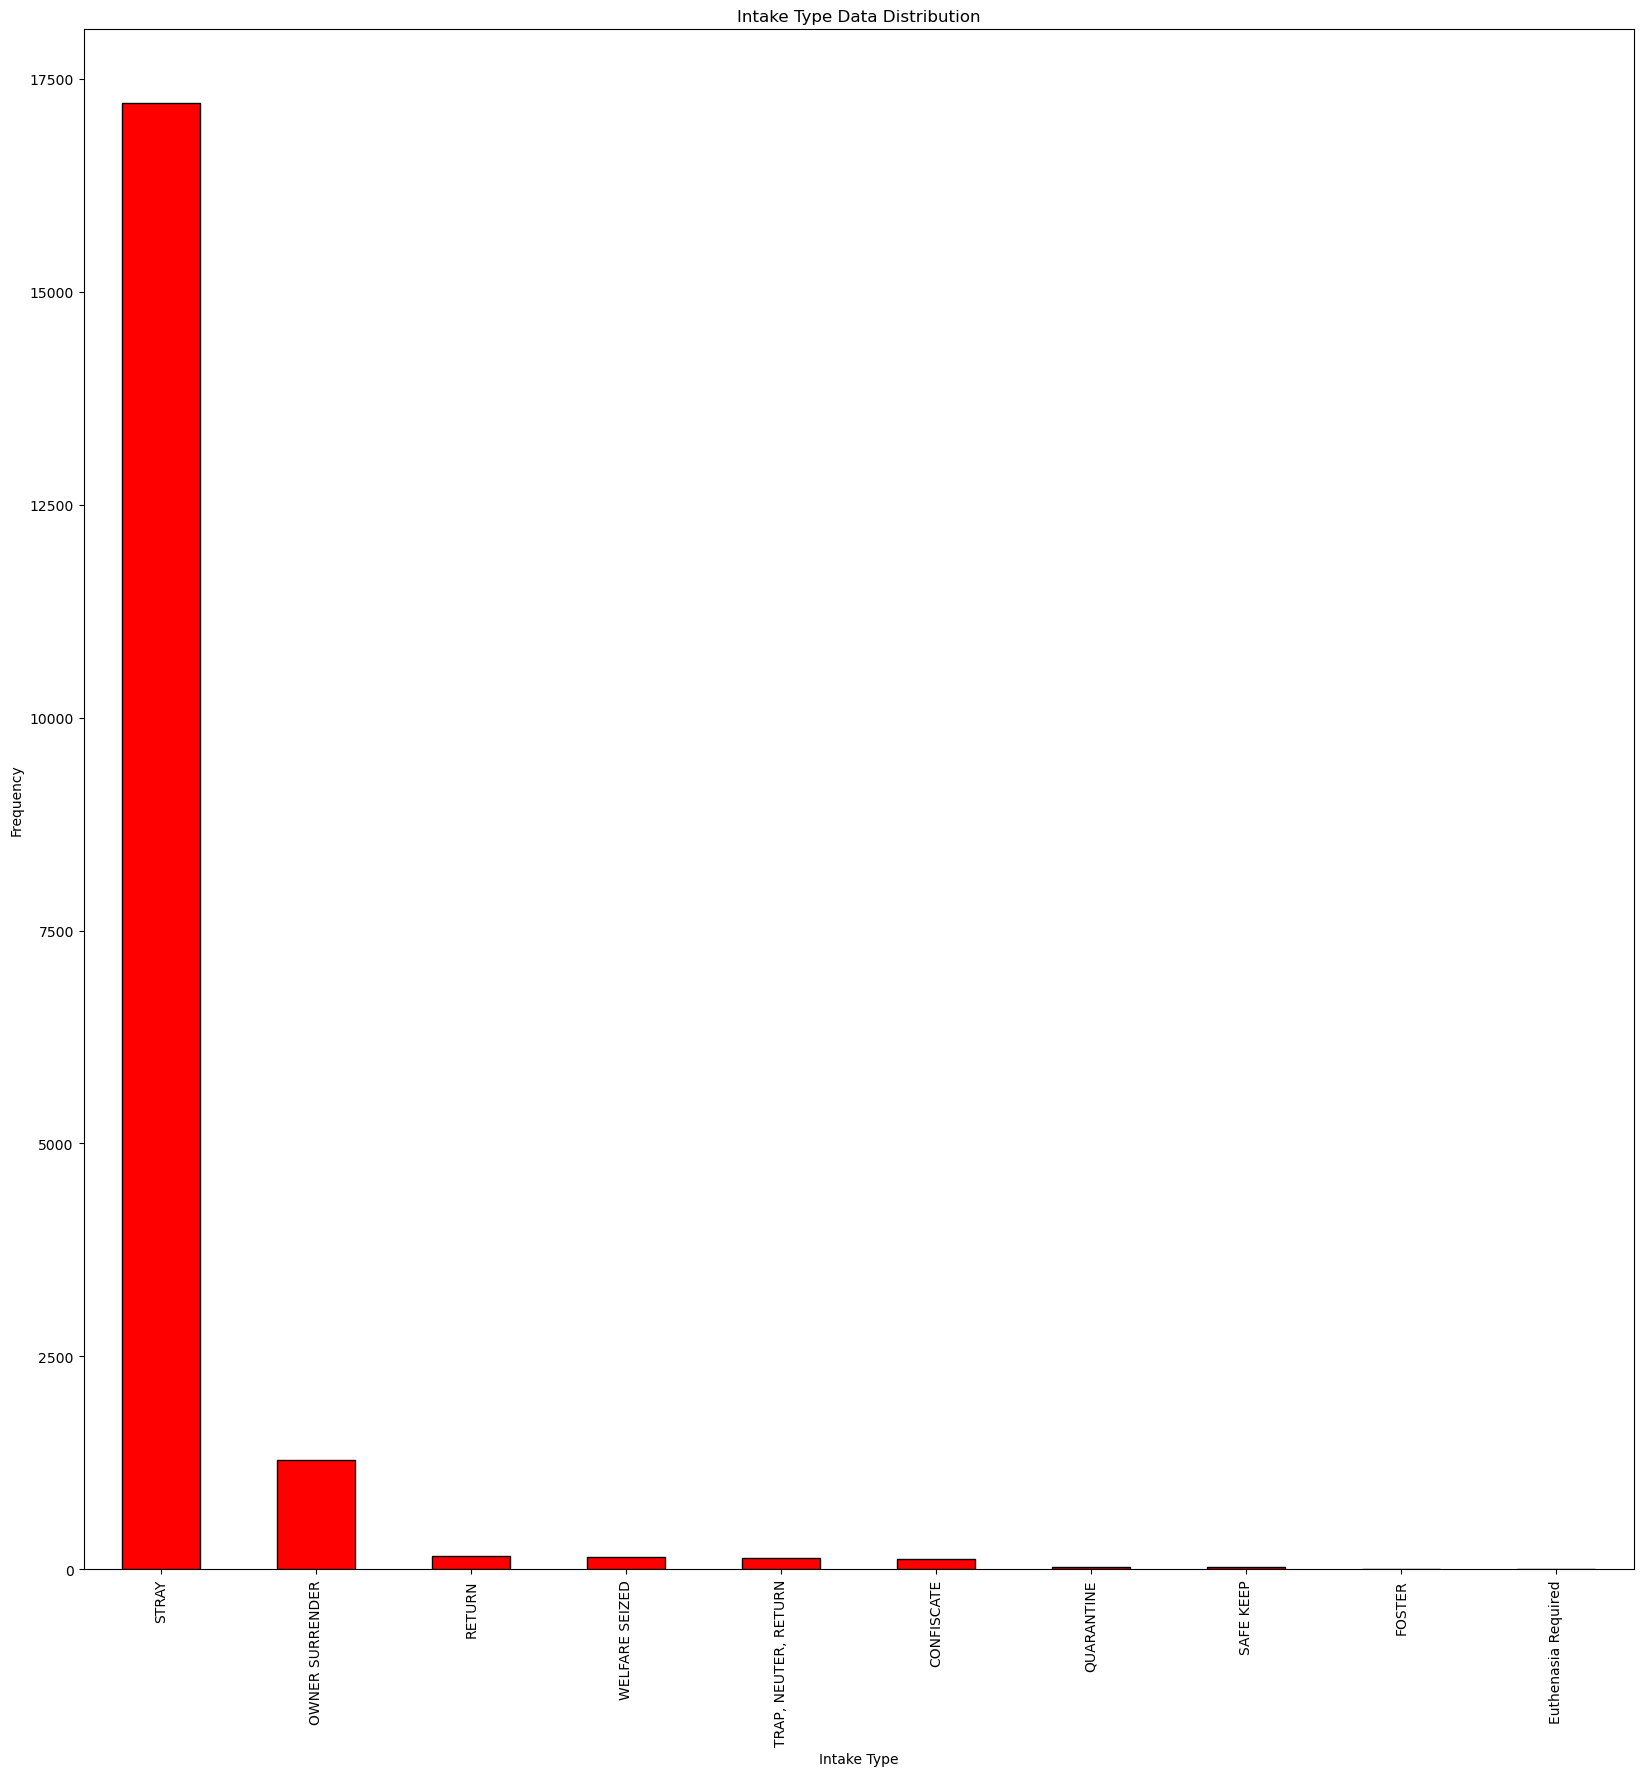

In [121]:
# ploting bar plot for Intake Type column

category_counts = new_df['Intake_Type'].value_counts()
category_counts.plot(kind='bar', color='red', edgecolor='black', figsize= (20,20))

# Adding labels and title
plt.xlabel('Intake Type')
plt.ylabel('Frequency')
plt.title('Intake Type Data Distribution')

# Display the plot
plt.show()

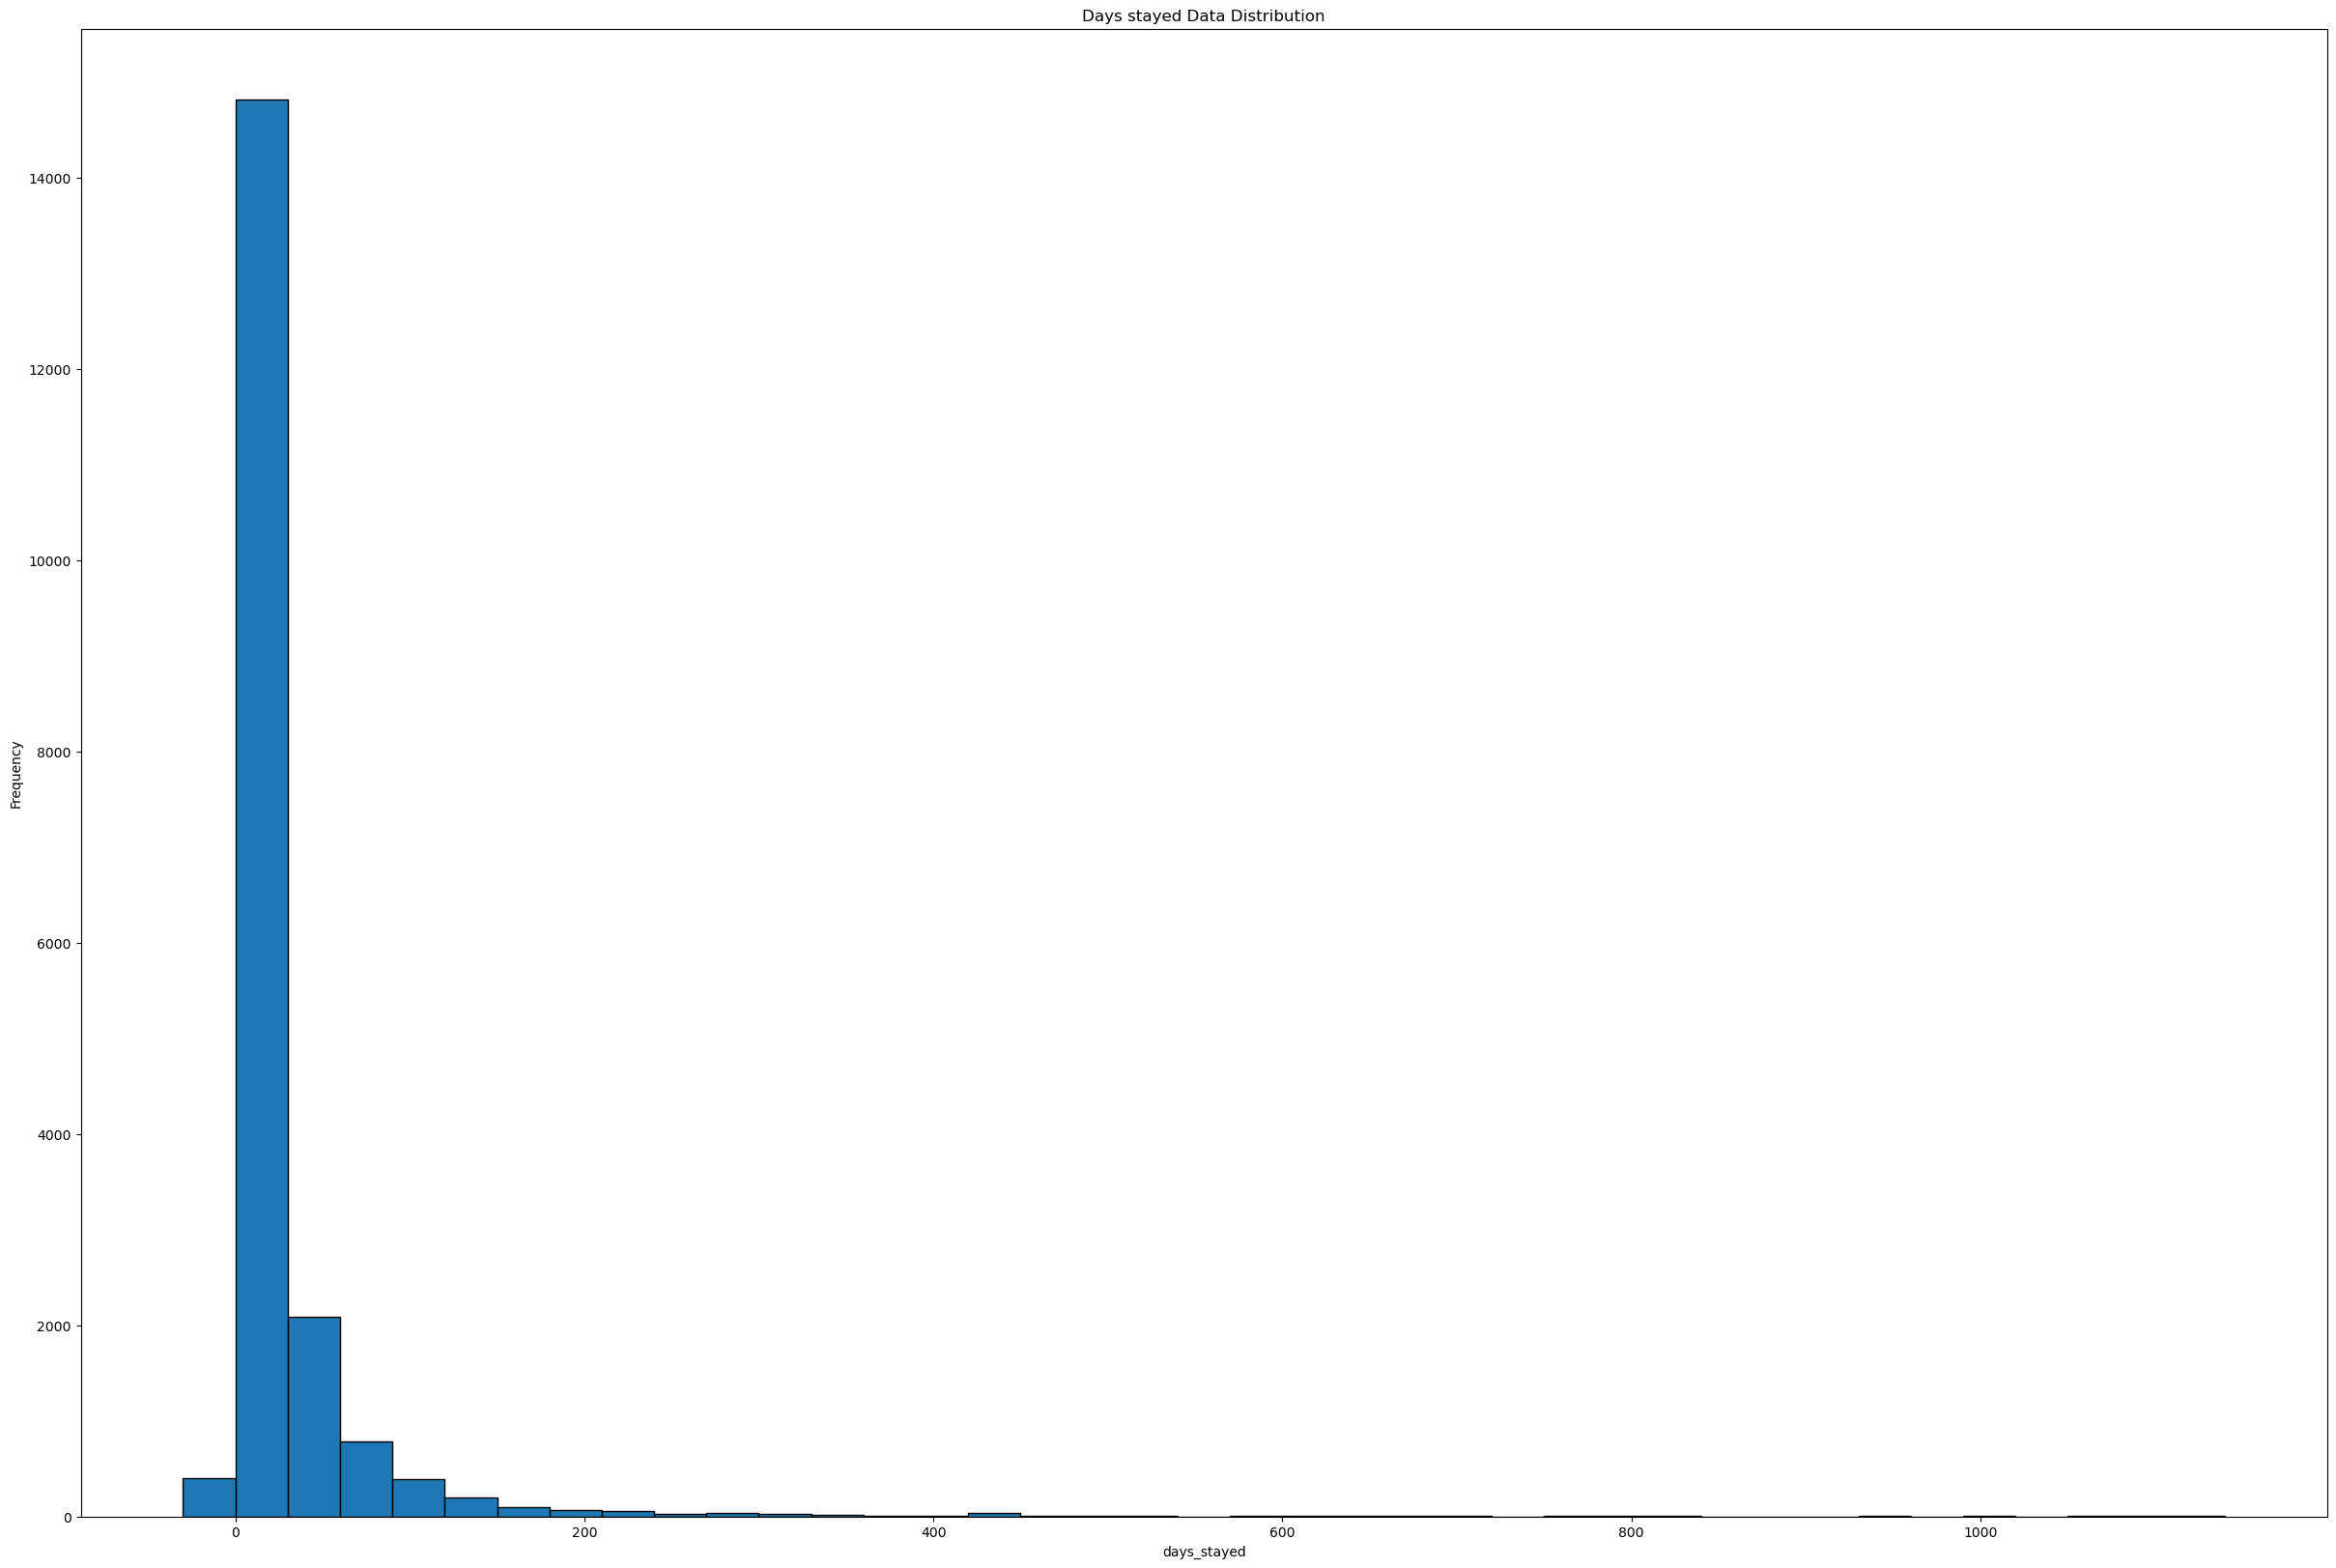

In [147]:
# ploting bar plot for days stayed column
# Calculate bin edges programmatically
bin_width = 30  # Adjust this based on your preference
min_value = int(np.floor(min(new_df['days_stayed']) / bin_width) * bin_width)
max_value = int(np.ceil(max(new_df['days_stayed']) / bin_width) * bin_width)
bins = range(min_value, max_value + bin_width, bin_width)

new_df['days_stayed'].plot(bins= bins, kind='hist', edgecolor='black', figsize= (30,20))

# category_counts = new_df['Sex'].value_counts()
# category_counts.plot(kind='bar', color='blue', edgecolor='black')

# Adding labels and title
plt.xlabel('days_stayed')
plt.ylabel('Frequency')
plt.title('Days stayed Data Distribution')

# # Display the plot
plt.show()

**Here we see a good amount of the cat leaves shelter with in a month and most of them leaves by 6 months. But for some exceptional cases cat stays upto several years**

In [150]:
# I just got a thought we can use the year cat was taken input for visualization too
new_df['Intake_Date'] = pd.to_datetime(new_df['Intake_Date'], format='%m/%d/%y')
# Create a new column 'Year' with the year component
new_df['Year'] = new_df['Intake_Date'].dt.year
new_df

/var/folders/gg/llps9cpn1lsdx8__qqd2w6v80000gn/T/ipykernel_3294/2806632522.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Intake_Date'] = pd.to_datetime(new_df['Intake_Date'], format='%m/%d/%y')
/var/folders/gg/llps9cpn1lsdx8__qqd2w6v80000gn/T/ipykernel_3294/2806632522.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Year'] = new_df['Intake_Date'].dt.year


,Primary_Color,Sex,Age,Intake_Date,Intake_Condition,Intake_Type,days_stayed,Year
0,BRN TABBY,Male,7,2017-01-04,INJURED SEVERE,STRAY,1,2017
1,BLACK,Female,7,2017-01-05,NORMAL,OWNER SURRENDER,1,2017
2,TORTIE,Spayed,7,2017-01-14,FERAL,STRAY,10,2017
3,GRAY,Male,6,2017-01-14,NORMAL,STRAY,1,2017
4,GRAY TABBY,Male,4,2023-01-24,ILL SEVERE,STRAY,1,2023
...,...,...,...,...,...,...,...,...
19096,BRN TABBY,Unknown,0,2023-10-21,UNDER AGE/WEIGHT,STRAY,0,2023
19097,UNKNOWN,Female,0,2023-10-18,ILL MILD,STRAY,-1,2023
19098,UNKNOWN,Male,0,2023-10-18,ILL MILD,STRAY,-1,2023
19099,ORANGE,Male,7,2023-10-20,ILL MILD,STRAY,-1,2023


### make a date timeline chart for checking cat staying over years

Text(0.5, 1.0, 'Average day_stay over time')

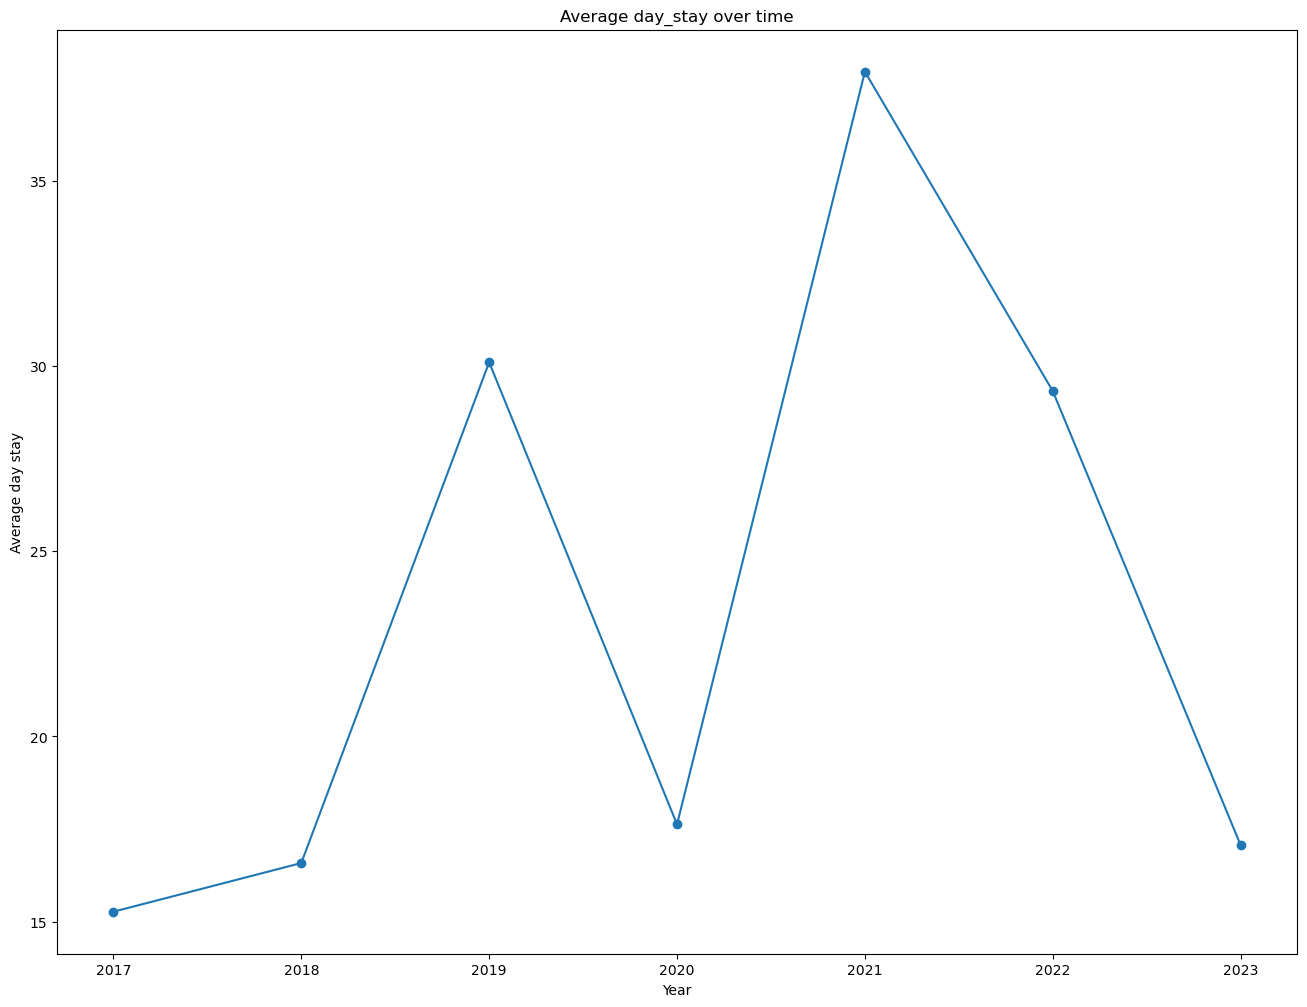

In [155]:

average_day_stay = new_df.groupby('Year')['days_stayed'].mean()

plt.figure(figsize= (16, 12))

plt.plot(average_day_stay.index, average_day_stay.values, marker ='o', linestyle= '-')

plt.xlabel('Year')
plt.ylabel('Average day stay')
plt.title('Average day_stay over time')

**We see there was a hike in cat staying (longer stay) during 2020-2021 and drop significantly after wards. It could be because of the of the covid time and now in 2023 the staying time drop to pre-covid time again**

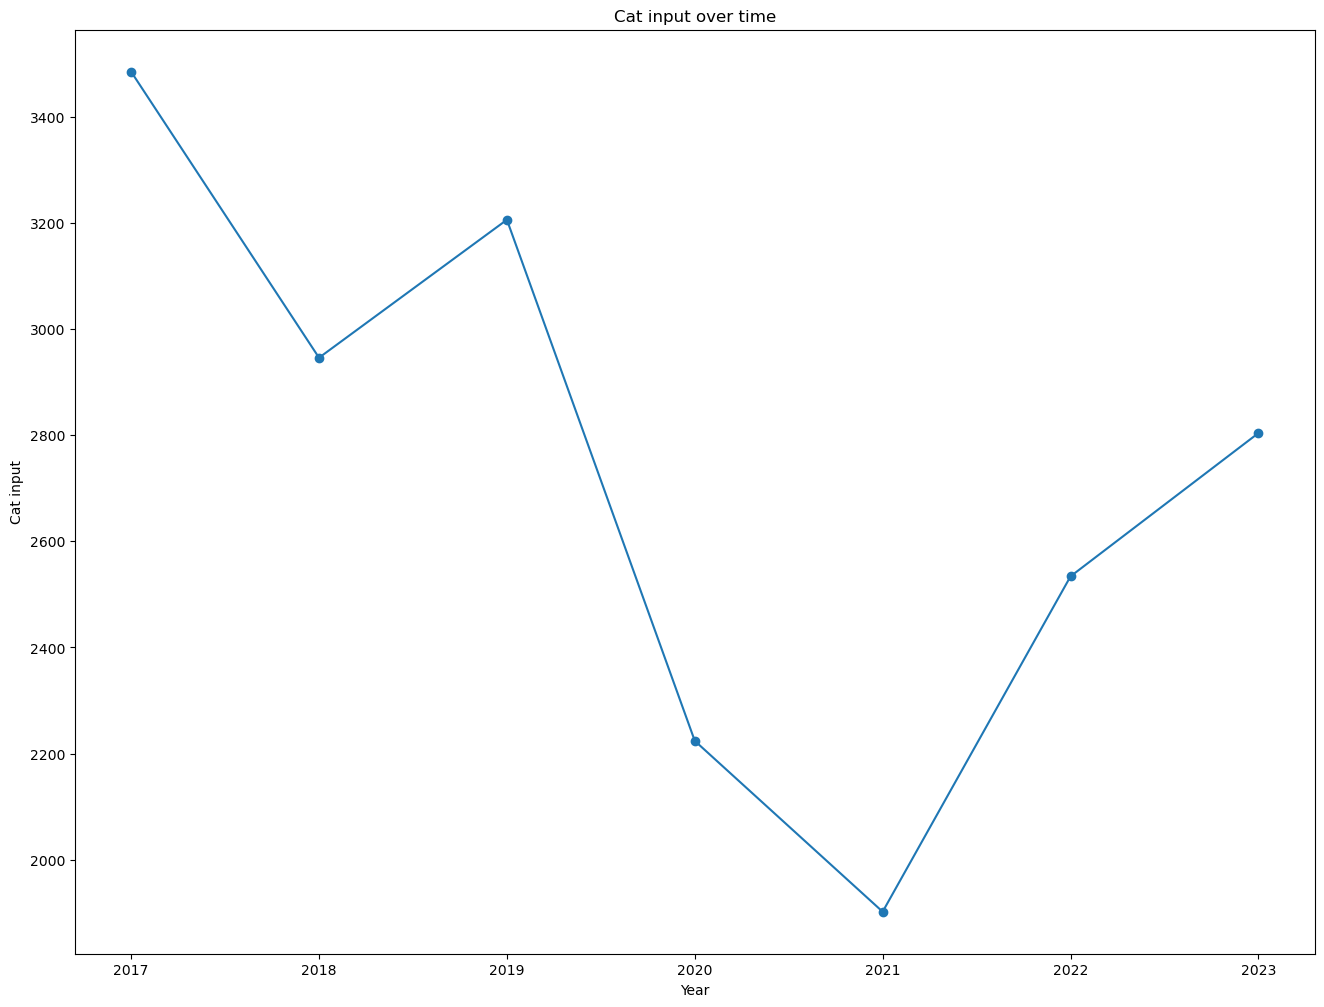

Cat input by year:
Year
2017    3485
2018    2946
2019    3206
2020    2224
2021    1902
2022    2534
2023    2804
dtype: int64


In [165]:

# Group by 'Year' and get the count of occurrences
cat_input = new_df.groupby('Year').size()

plt.figure(figsize=(16, 12))

plt.plot(cat_input.index, cat_input.values, marker='o', linestyle='-')

plt.xlabel('Year')
plt.ylabel('Cat input')
plt.title('Cat input over time')

plt.show()
print('Cat input by year:')
print(cat_input)

**From Above two time line we do see during 2020-2021 cat input was the lowest but cat stay was highest. Clearly a covid effact visible there**

# Using a pairplot, display all of the linear relationship.

/Users/ubaydulsami/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


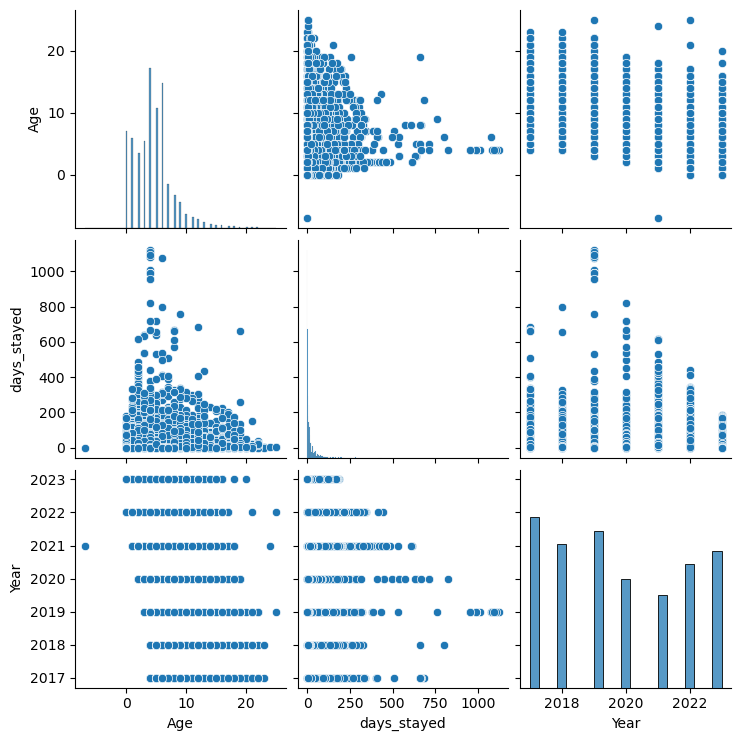

In [167]:
# Using a pairplot, display all of the linear relationship.

# setting plot size
# plt.figure(figsize=(12, 10))

sns.pairplot(new_df)

# Show the pairplot
plt.show()

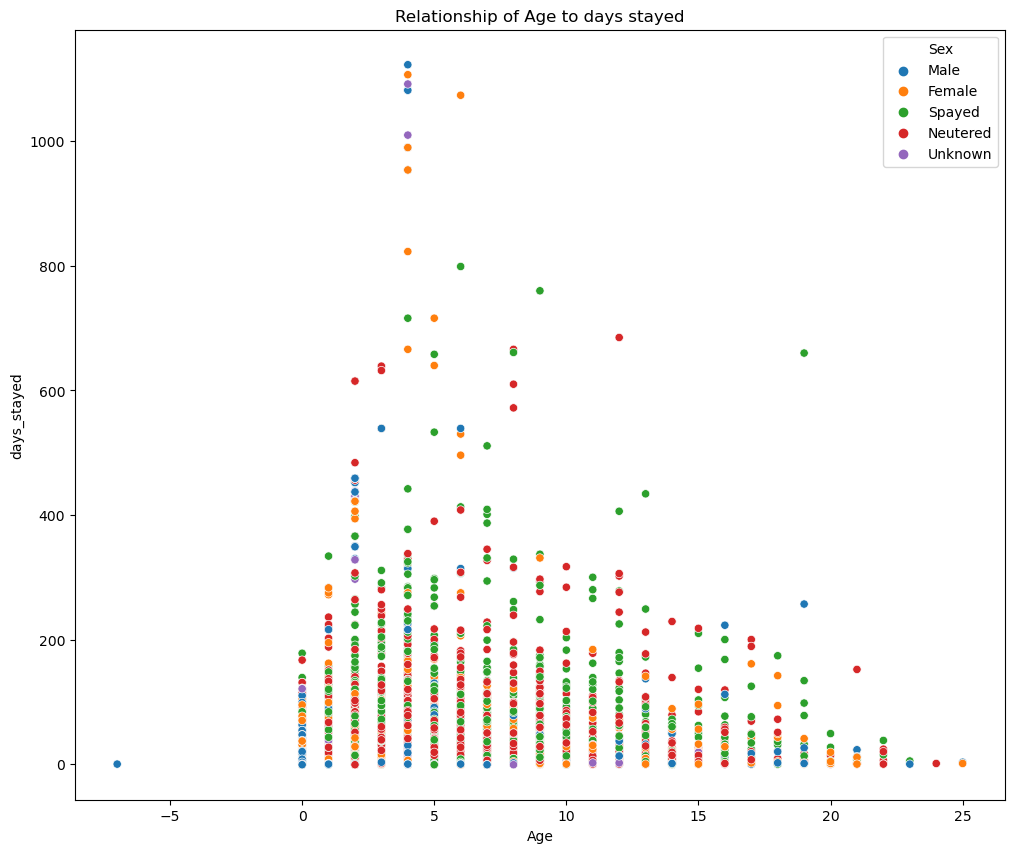

In [176]:
# Make a scatter plot of Age vs Days stay

# Setting the figure size
plt.figure(figsize=(12, 10))

relationship_age_days_stayed = sns.scatterplot(
    data=new_df, 
    x='Age', 
    y='days_stayed',
    hue= 'Sex');

relationship_age_days_stayed.set_title("Relationship of Age to days stayed");

#showing figure
plt.show()


<Figure size 800x800 with 0 Axes>

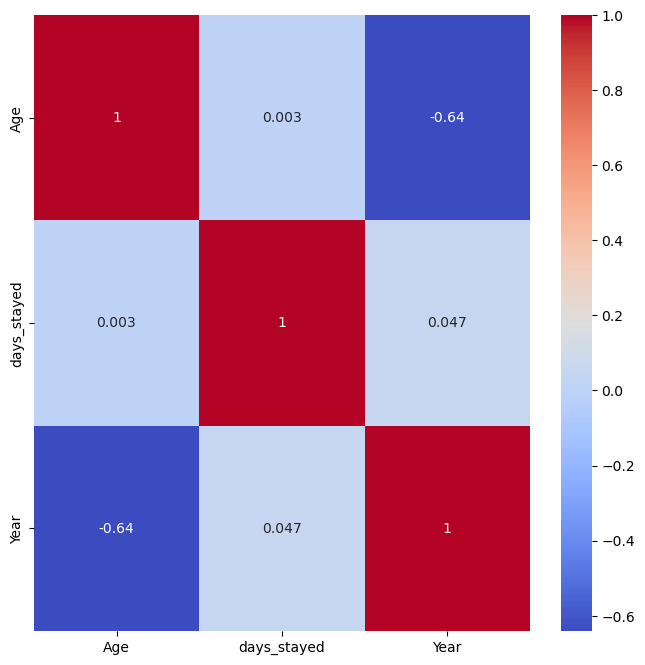

In [175]:
# * Make a heatmap plot of all of the correlations in our dataset.
# * Change the figure size of our heatmap plot to be 8x8

# setting plot size
plt.figure(figsize=(8, 8))

# sns.heatmap(new_df.corr(), 
#             annot=True, 
#             cmap='coolwarm');

# # Show the heatmap
# plt.show()
numeric_df = new_df.select_dtypes(include='number')

# Setting plot size
plt.figure(figsize=(8, 8))

# Create a heatmap of correlations for numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')

# Show the heatmap
plt.show()

**We need to convert the other columns which has string values into binary value using "get_dummies", to find better correlations**